In [29]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [28]:
# Directories for training, validation, and testing datasets
train_dir = "datasets/pest/train"
val_dir = "datasets/pest/val"
test_dir = "datasets/pest/test"

In [30]:
# Data augmentation for the training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Rescale images for the validation and test sets
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


In [31]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


In [32]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 12120 images belonging to 9 classes.
Found 896 images belonging to 9 classes.
Found 1149 images belonging to 9 classes.


In [35]:
from tensorflow.keras import layers, models

model = models.Sequential([
    # Input layer
    layers.Input(shape=(150, 150, 3)),

    # First Convolutional Block
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Second Convolutional Block
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Third Convolutional Block
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Fourth Convolutional Block
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Flatten and Dense Layers
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(train_generator.num_classes, activation='softmax')  # Use the number of classes from the generator
])


In [36]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [37]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 9)              │         4,617 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,457,225 (13.19 MB)

 Trainable params: 3,457,225 (13.19 MB)

 Non-trainable params: 0 (0.00 B)

In [38]:
# Unfreeze the last 4 layers of the base model
for layer in base_model.layers[-4:]:
    layer.trainable = True


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Initialize ImageDataGenerators
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255) 
test_datagen = ImageDataGenerator(rescale=1./255)

# Ensure correct image resizing in generators
train_generator = train_datagen.flow_from_directory(
    'datasets/pest/train',
    target_size=(64, 64),  # Correct image size
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    'datasets/pest/val',
    target_size=(64, 64),  # Correct image size
    batch_size=32,
    class_mode='categorical'
)

test_generator = train_datagen.flow_from_directory(
    'datasets/pest/test',
    target_size=(64, 64),  # Correct image size
    batch_size=32,
    class_mode='categorical'
)

# Load the pre-trained VGG16 model without the top layer (classification head)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

# Freeze the base model layers
base_model.trainable = False

# Add new layers for your specific problem
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(9, activation='softmax')  # Output layer for 9 classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Learning rate scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

# Train the model with the learning rate scheduler
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=val_generator,
    callbacks=[lr_scheduler]
)


Found 2700 images belonging to 9 classes.
Found 450 images belonging to 9 classes.


c:\Users\Benedictdrxas\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 34s 386ms/step - accuracy: 0.1863 - loss: 2.2236 - val_accuracy: 0.4644 - val_loss: 1.7361 - learning_rate: 0.0010
Epoch 2/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 32s 381ms/step - accuracy: 0.3999 - loss: 1.7369 - val_accuracy: 0.6222 - val_loss: 1.4091 - learning_rate: 0.0010
Epoch 3/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 32s 381ms/step - accuracy: 0.4998 - loss: 1.4678 - val_accuracy: 0.7200 - val_loss: 1.2071 - learning_rate: 0.0010
Epoch 4/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 31s 367ms/step - accuracy: 0.5912 - loss: 1.2705 - val_accuracy: 0.7644 - val_loss: 1.0140 - learning_rate: 0.0010
Epoch 5/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 30s 358ms/step - accuracy: 0.6505 - loss: 1.0996 - val_accuracy: 0.8000 - val_loss: 0.8639 - learning_rate: 0.0010
Epoch 6/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 31s 359ms/step - accuracy: 0.7100 - loss: 0.9600 - val_accuracy: 0.8333 - val_loss: 0.7626 - learning_rate: 0.0010
Epoch 7/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 31s 362ms/step - accuracy: 0.7446 - loss: 0.

In [15]:
# Prepare the test data
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory('datasets/pest/test', target_size=(64, 64), batch_size=32, class_mode='categorical')

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


Found 449 images belonging to 9 classes.
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 488ms/step - accuracy: 0.9668 - loss: 0.1765
Test Accuracy: 96.21%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


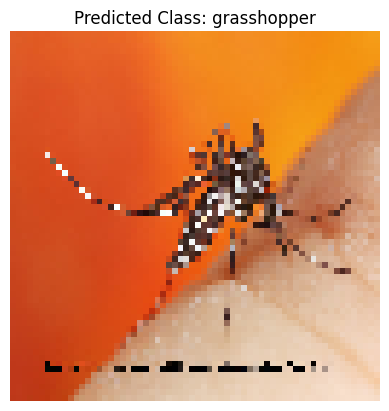

Predicted Class: grasshopper, Confidence: 0.63


In [25]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load an image to predict (replace with your image path)
img_path = 'datasets/pest/download (3).jpg'

# Load and preprocess the image (resize to match the input shape)
img = image.load_img(img_path, target_size=(64, 64))  # Resize image
img_array = image.img_to_array(img)  # Convert image to array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Rescale image as done during training

# Make prediction
predictions = model.predict(img_array)

# Get the predicted class index
predicted_class_index = np.argmax(predictions, axis=1)

# Map index to class names
class_names = train_generator.class_indices  # Get class names from the training data
inv_class_names = {v: k for k, v in class_names.items()}  # Reverse the dictionary

# Get the predicted class name
predicted_class = inv_class_names[predicted_class_index[0]]

# Show the image and prediction result
plt.imshow(img)
plt.title(f'Predicted Class: {predicted_class}')
plt.axis('off')
plt.show()

# Print the predicted class and the confidence score
confidence_score = predictions[0][predicted_class_index[0]]
print(f"Predicted Class: {predicted_class}, Confidence: {confidence_score:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


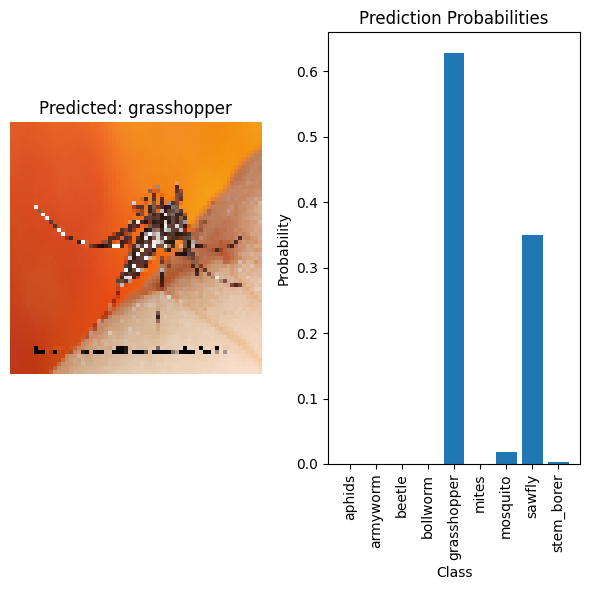

Predicted Class: grasshopper, Confidence: 0.63


In [27]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load an image to predict (replace with your image path)
img_path = 'datasets/pest/download (3).jpg'

# Load and preprocess the image (resize to match the input shape)
img = image.load_img(img_path, target_size=(64, 64))  # Resize image
img_array = image.img_to_array(img)  # Convert image to array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Rescale image as done during training

# Make prediction
predictions = model.predict(img_array)

# Get the predicted class index
predicted_class_index = np.argmax(predictions, axis=1)

# Map index to class names
class_names = train_generator.class_indices  # Get class names from the training data
inv_class_names = {v: k for k, v in class_names.items()}  # Reverse the dictionary

# Get the predicted class name
predicted_class = inv_class_names[predicted_class_index[0]]

# Show the image and prediction result
plt.figure(figsize=(6, 6))

# Plot image
plt.subplot(1, 2, 1)  # Plot on the left side
plt.imshow(img)
plt.title(f'Predicted: {predicted_class}')
plt.axis('off')

# Plot the prediction probabilities as a bar chart
plt.subplot(1, 2, 2)  # Plot on the right side
plt.bar(range(len(predictions[0])), predictions[0])
plt.xticks(range(len(predictions[0])), class_names.keys(), rotation=90)
plt.title('Prediction Probabilities')
plt.xlabel('Class')
plt.ylabel('Probability')

# Show the plot
plt.tight_layout()
plt.show()

# Print the predicted class and the confidence score
confidence_score = predictions[0][predicted_class_index[0]]
print(f"Predicted Class: {predicted_class}, Confidence: {confidence_score:.2f}")
